## This notebook would be used to visualize the various audio features obtained

In [1]:
import os
import pickle
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as ms
from tqdm import tqdm
import librosa
import math
import random
import pandas as pd
from IPython.display import Audio
import librosa.display
# ms.use('seaborn-muted')
%matplotlib inline

In [2]:
audio_vectors = pickle.load(open('data/pre-processed/audio_vectors_1.pkl', 'rb'))

In [3]:
y1 = audio_vectors['Ses01F_script01_2_F011']  # Angry
y2 = audio_vectors['Ses01F_script02_2_F036']  # Sad

In [4]:
min_len = min(len(y1), len(y2))
y1, y2 = y1[:min_len], y2[:min_len]

In [5]:
sr = 44100

In [6]:
Audio(y1, rate=sr)

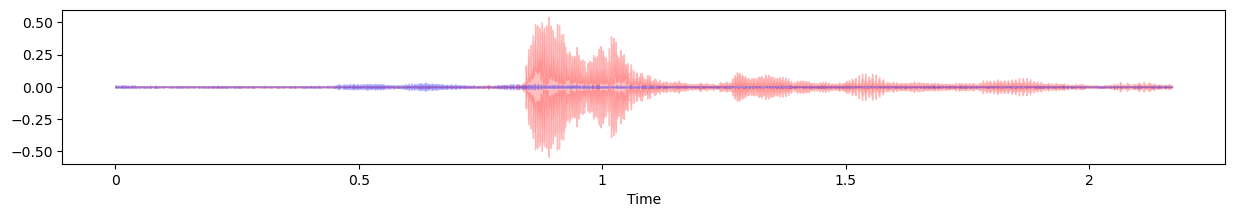

In [7]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(15, 2))
librosa.display.waveshow(y1, sr=sr,  alpha=0.25, color='r')
librosa.display.waveshow(y2, sr=sr,  alpha=0.25, color='b')
plt.show()


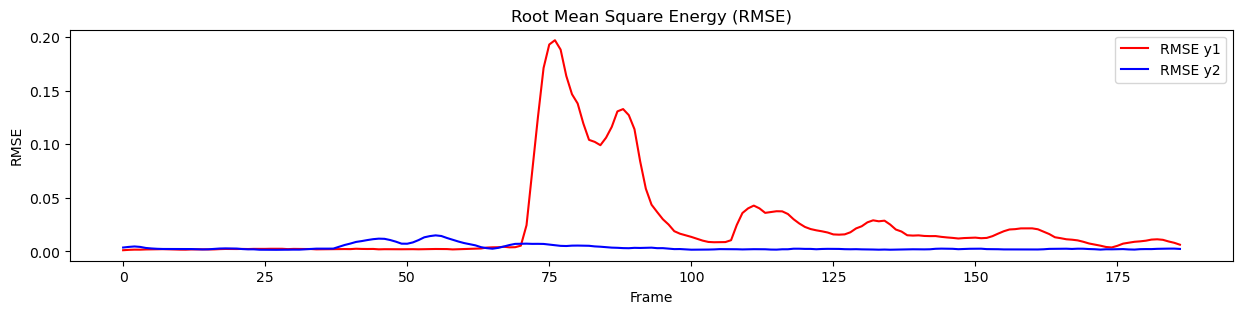

In [8]:
import librosa
import matplotlib.pyplot as plt

# Hitung RMS energy
rmse1 = librosa.feature.rms(y=y1 + 0.0001)[0]
rmse2 = librosa.feature.rms(y=y2 + 0.0001)[0]

plt.figure(figsize=(15, 3))
plt.plot(rmse1, color='r', label='RMSE y1')
plt.plot(rmse2, color='b', label='RMSE y2')
plt.ylabel('RMSE')
plt.xlabel('Frame')
plt.title('Root Mean Square Energy (RMSE)')
plt.legend()
plt.show()


In [9]:
silence1 = 0
for e in rmse1:
    if e <= 0.3 * np.mean(rmse1):
        silence1 += 1
        
silence2 = 0
for e in rmse2:
    if e <= 0.3 * np.mean(rmse2):
        silence2 += 1

print(silence1/float(len(rmse1)), silence2/float(len(rmse2)))

0.41711229946524064 0.0


Text(0, 0.5, 'Harmonics')

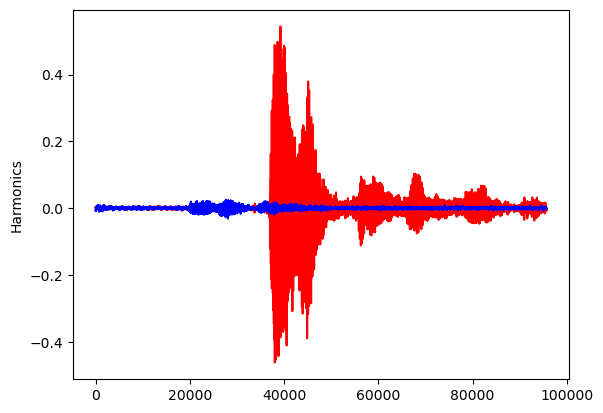

In [10]:
y1_harmonic = librosa.effects.hpss(y1)[0]
y2_harmonic = librosa.effects.hpss(y2)[0]
# plt.figure(figsize=(5,2))
plt.plot(y1, color='r')
plt.plot(y2, color='b')
plt.ylabel('Harmonics')

Text(0, 0.5, 'Autocorrelations')

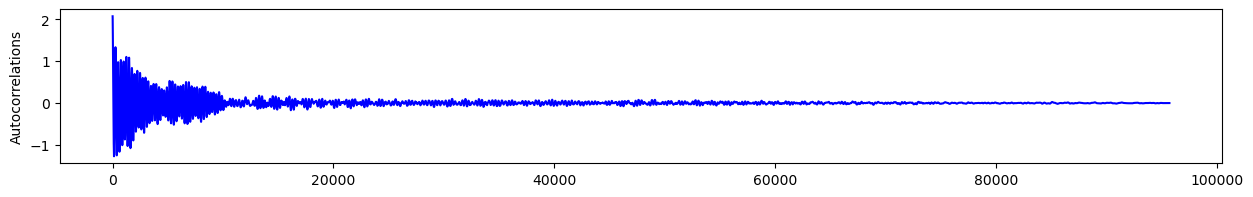

In [11]:
autocorr1 = librosa.core.autocorrelate(y1)
autocorr2 = librosa.core.autocorrelate(y2)
plt.figure(figsize=(15,2))
plt.plot(autocorr2, color='b')
plt.ylabel('Autocorrelations')

Text(0, 0.5, 'Center-clipped Autocorrelation')

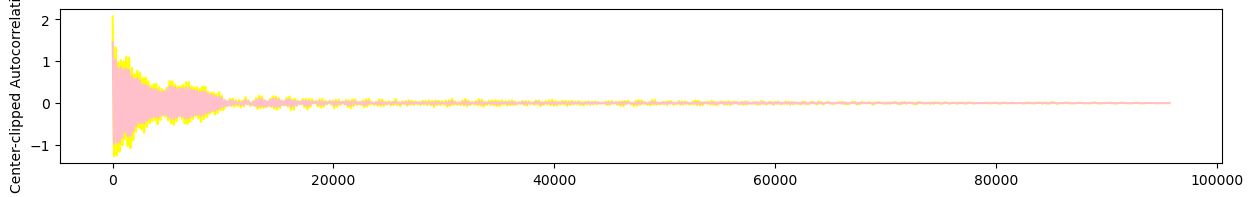

In [12]:
cl = 0.45 * np.mean(abs(y2))
center_clipped = []
for s in y2:
    if s >= cl:
        center_clipped.append(s - cl)
    elif s <= -cl:
        center_clipped.append(s + cl)
    elif np.abs(s) < cl:
        center_clipped.append(0)
new_autocorr = librosa.core.autocorrelate(np.array(center_clipped))
plt.figure(figsize=(15,2))
plt.plot(autocorr2, color='yellow')
plt.plot(new_autocorr, color='pink')
plt.ylabel('Center-clipped Autocorrelation')